## Zadania

### Regresja liniowa - Zadanie 1

Uwaga: treść zadania nawiązuje do analiz tworzonych podczas lekcji - potraktuj je jako ciąg dalszy tych analiz.


Zbuduj model używając tylko jednej zmiennej dla pozostałych atrybutów i wybierz ten, który uzyskuje najlepsze wyniki pomiaru jakości regresji. Następnie porównaj najlepiej działający model z regresją wyuczoną na wszystkich zmiennych objaśniających.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import datasets

In [2]:
# Dane:https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html
# "Ten baseline variables, age, sex, body mass index, average blood pressure, 
# and six blood serum measurements were obtained for each of n = 442 diabetes patients, 
# as well as the response of interest, a quantitative measure of disease progression one year after baseline."
# diabetes = datasets.load_diabetes()
# data = diabetes.data # nalezy je przekształcić do pandasowego dataframe'u
data = pd.read_csv('diabetes.csv')
data.head()

# Y - a quantitative measure of disease progression one year after baseline
# Y - ilościowa miara progresji choroby rok po punkcie początkowym

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


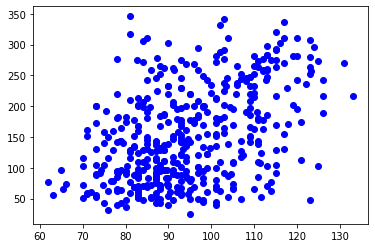

In [3]:
# plt.scatter(data.BMI, data.Y,  color='red')
plt.scatter(data.BP, data.Y,  color='blue')
# plt.scatter(data.AGE, data.Y, color='orange')
# plt.scatter(data.S5, data.Y, color='gray')
# plt.scatter(data.SEX, data.Y, color='violet')
# plt.scatter(data.S1, data.Y, color='brown')
# plt.scatter(data.S2, data.Y, color='green')
# plt.scatter(data.S3, data.Y, color='black')
# plt.scatter(data.S4, data.Y, color='yellow')
# plt.scatter(data.S6, data.Y, color='olive')

In [4]:
print(data.AGE.corr(data.Y)) # pandas
print(data.SEX.corr(data.Y)) # pandas
print(data.BP.corr(data.Y)) # pandas
print(data.S1.corr(data.Y)) # pandas
print(data.S2.corr(data.Y) )# pandas
print(data.S3.corr(data.Y)) # pandas
print(data.S4.corr(data.Y) )# pandas
print(data.S6.corr(data.Y)) # pandas

0.18788875071891972
0.04306199845160534
0.4414817585625712
0.21202248101455065
0.17405358696874254
-0.39478925067091863
0.43045288474477267
0.382483484248581


In [5]:
corr = data.corr()
# corr

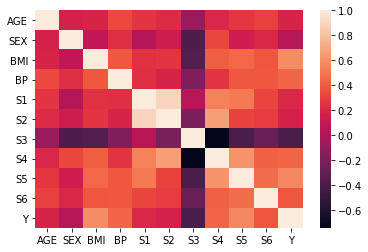

In [13]:
import seaborn as sns
sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns)

In [7]:
data.isnull().values.any()

False

In [8]:
dataset = data.iloc[:,:-1] # wyodrebniamy zmienne objaśniające bez targetu
# dataset

In [9]:
# Wyodrębniamy dane treningowe i testowe
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['BP']], data.Y, test_size=0.7, random_state=0)
# print(X_train, X_test, y_train, y_test)

In [11]:
# 1. Tworzymy obiekt modelu
model = LinearRegression()
# 2. Trenujemy model na danych treningowych
model.fit(X_train, y_train)
# 3. Sprawdzamy poprawność działania modelu - model dokonuje predykcji na danych testowych i porównuje jej wyniki
# z prawdziwymi etykietami tych danych - zwraca R^2 
model.score(X_test, y_test)

0.17165634082461081

In [14]:
model.coef_ # Podejrzyjmy współczynniki modelu

array([2.7755137])

In [15]:
model.intercept_ # Punkt przecięcia prostej z osią Y

-114.42573768460622

In [16]:
predykcje = model.predict(X_test)

In [17]:
predykcje

array([204.75833732, 190.88076884, 182.55422776, 115.94189906,
       221.4114195 , 143.69703602, 140.92152232, 188.10525515,
       127.04395384, 160.35011819, 129.81946754, 135.37049493,
       110.39087167,  68.75816623, 204.75833732, 149.24806341,
       174.22768667, 127.04395384, 154.7990908 , 210.30936471,
       204.75833732, 102.06433058, 193.65628254, 113.16638536,
       115.94189906, 129.81946754, 232.51347428, 102.06433058,
       185.32974145, 140.92152232, 235.28898798, 121.49292645,
       143.69703602, 115.94189906, 135.37049493, 165.90114558,
       138.14600863, 196.43179624, 154.7990908 , 175.14360619,
        91.87819532, 168.67665928, 107.61535797, 123.35252063,
       182.55422776, 115.94189906, 165.90114558, 154.7990908 ,
       133.51090075, 249.16655645, 171.45217297, 135.37049493,
       221.4114195 , 121.49292645, 218.6359058 , 213.08487841,
       143.69703602, 115.94189906, 143.69703602, 179.77871406,
       127.04395384, 154.7990908 , 103.92392476, 140.92

In [18]:
# Mean squared error
print("Mean squared error: %.2f"
      % np.mean((model.predict(X_test) - y_test) ** 2))

Mean squared error: 4655.78


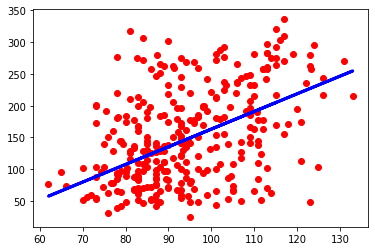

In [21]:
plt.scatter(X_test, y_test,  color='red')
plt.plot(X_test, predykcje, color='blue', linewidth=3)
plt.show()

In [22]:
# Wyodrębniamy dane treningowe i testowe
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[
    ['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']], data.Y, test_size=0.2, random_state=0)

In [23]:
# 1. Tworzymy obiekt modelu
model1 = LinearRegression()
# 2. Trenujemy model na danych treningowych
model1.fit(X_train, y_train)
# 3. Sprawdzamy poprawność działania modelu - model dokonuje predykcji na danych testowych i porównuje jej wyniki
# z prawdziwymi etykietami tych danych - zwraca R^2 
model1.score(X_test, y_test)

0.33223321731061806

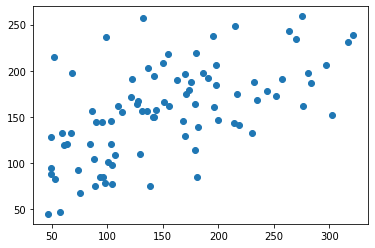

In [24]:
predykcje = model1.predict(X_test)
plt.scatter(y_test, predykcje)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, data.Y, test_size=0.2, random_state=0)

In [30]:
# 1. Tworzymy obiekt modelu
model2 = LinearRegression()
# 2. Trenujemy model na danych treningowych
model2.fit(X_train, y_train)
# 3. Sprawdzamy poprawność działania modelu - model dokonuje predykcji na danych testowych i porównuje jej wyniki
# z prawdziwymi etykietami tych danych - zwraca R^2 
model2.score(X_test, y_test)

0.33223321731061806

Text(0.5, 0, 'Importance')

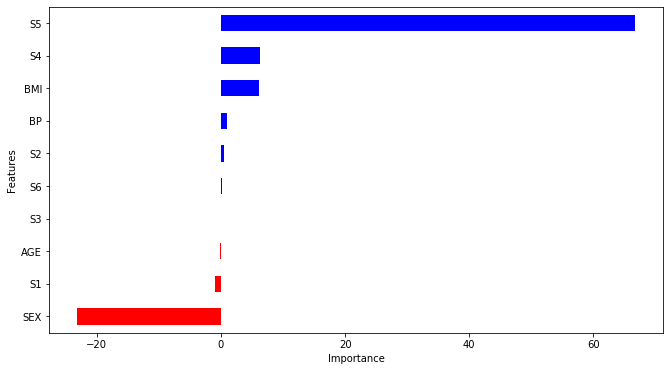

In [31]:
# Wizualizacja współczynników zmiennych w przypadku więcej niż jednej zmiennej objaśniającej
coeff = list(model2.coef_)
labels = list(X_train.columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')